## Exploratory Data Analysis ##
In this assignment, we will be exploring some airline data that has been collected measuring the lateness of various airlines.  Refer to the rubric below for the grading criteria.  For the below you'll need jupyter and python installed on your machine as well as matplotlib and pandas.  

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import trim_mean
import seaborn as sns

### 1 Load the airline_dataset.csv dataset into a DataFrame. ###

In [58]:
df = pd.read_csv('../data/airline_dataset.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


### 2 Review the data, print out a portion of the DataFrame. ###

In [59]:
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [60]:
# Data Cleaning

# check data structure
print(df.shape)
df.info()

# check missing values
df.isna().sum()
df = df.dropna(subset=["pct_weather_delay"]) # drop if missing value

#check invalid values
invalid = df[(df['pct_weather_delay'] < 0) | (df['pct_weather_delay'] > 100)]
print(invalid)
df = df[(df['pct_weather_delay'] >= 0) & (df['pct_weather_delay'] <= 100)] # drop if invalid value

# check cleaned data
print("Final shape:", df.shape)
df.isna().sum()

(33468, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB
Empty DataFrame
Columns: [pct_carrier_delay, pct_atc_delay, pct_weather_delay, airline]
Index: []
Final shape: (33440, 4)


pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

### 3 What is the central tendency of the pct_weather_delay feature? ###
1. What is the mean for the entire feature?
2. What are the means for each airline?
3. What is the (10%) trimmed mean for the entire feature?
4. What is the (10%) trimmed mean for each airline?

In [61]:
overall_mean = df["pct_weather_delay"].mean()

airline_means = df.groupby("airline")["pct_weather_delay"].mean()

airline_tmeans = df.groupby("airline")["pct_weather_delay"].apply(lambda x: trim_mean(x, 0.1))

overall_tmean = trim_mean(df["pct_weather_delay"], 0.1)

metrics = pd.DataFrame({
    "Mean": airline_means,
    "Trimmed Mean": airline_tmeans
})

metrics.loc["Overall"] = [overall_mean, overall_tmean]

metrics

,Mean,Trimmed Mean
airline,,
Alaska,0.513497,0.234498
American,1.122920,0.965972
Delta,0.680765,0.447485
Jet Blue,0.465327,0.303844
Southwest,0.512611,0.383843
United,0.680697,0.413050
Overall,0.684776,0.466343


### 4 Plot the pct_weather_delay feature to boxplots for all 6 airlines. ###

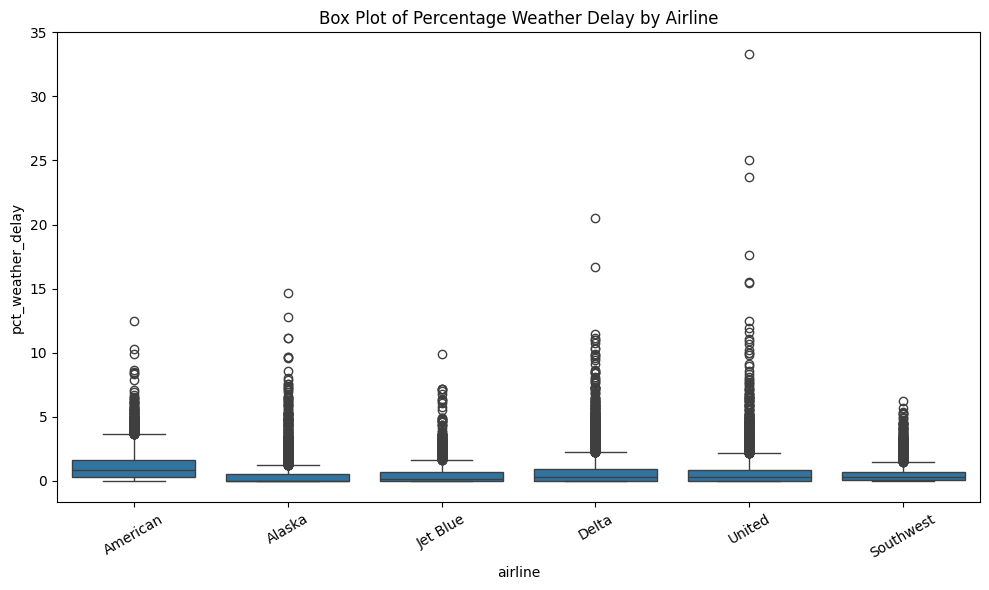

In [62]:
col_y = "pct_weather_delay"
col_x = "airline"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=col_x, y=col_y)
plt.title("Box Plot of Percentage Weather Delay by Airline")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



### Summarize the exploration.  Make some commentary on the performance of airlines due to weather delays. ###

**Overall performance:**  
According to the data, overall mean of weather delay of all airlines is around 0.68% while the 10% trimmed mean is 0.46%. Trimmed mean is lower than original mean indicates that some severe weather periods like strong winds and snow (in our data it could be outliers) raise the rate of weather delay. 

**Airline comparison:**
- **American Airlines** has the **highest weather-delay share** (mean 1.12%). Its boxplot proves this with a higher median and many outliers, suggesting it is most affected by severe weather.  
- **Jet Blue** and **Alaska** have the **lowest means** (0.47% and 0.51%), with much lower trimmed means (0.30% and 0.23%). Their boxplots have short boxes and fewer extreme points, showing **stable performance with limited weather impact**.  
- **Southwest** is also low (0.51% mean), similar to Alaska.  
- **Delta** and **United** fall in the middle (≈0.68% means), but **United** has the most extreme outliers (up to ~35%), which explains the large gap between its mean (0.68%) and trimmed mean (0.41%).

**Conclusion:**  
Most airlines keep weather delays under 1% in typical conditions. **American** is most affected, while **Jet Blue and Alaska** are least affected and most consistent. 




### Rubric ###
1. (1 point)Formatting and writing must be professionally done, and all answers/results/conclusions must be prominent.  This means removing the TODO's as well.  Replace those with your code.  
2. (1 point) Datset is loaded into a dataframe and partially displayed.
3. (4 points) All 6 airlines' and the overall mean and trimmed means are calculated and shown.
4. (1 point) A box plot (or several) are displayed with the airline data.
5. (1 point) A summarization, in prose, explains the results of the analysis.